In [2]:
from IPython.display import Image
import torch

## basics

- `tensor.view`/`torch.reshape`
    - `torch.transpose()`
- `torch.cat`
- `torch.stack`
- `torch.flatten`

- `torch.squeeze()`/`torch.unsqueeze()`
- `torch.transpose()`/`torch.permute()`
- reverse: 注意不是 `[::-1]`（torch 中不支持负数的 step）
    - torch.flip

## `torch.view` vs. `torch.reshape`

- 都可以重新组织 shape，
- `Tensor.view` 返回的是视图，数据共享，有 contiguous 约束要求
- Contiguous
    - https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays
    - https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch
- 从 robust（接口适配面上）`Tensor.reshape()` is more robust，没有 contiguous 约束要求 
    - `Tensor.reshape()`, It will work on any tensor, 
    - `Tensor.view()` works only on tensor `t` where `t.is_contiguous()==True`.
        - `t.contiguous().view()`

In [14]:
z = torch.zeros(3, 2)
x = z.view(2, 3)
print(x.is_contiguous())
# z.fill_(1)
# x
x.fill_(1)
z

True


tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [16]:
# reshape 
z = torch.zeros(3, 2)
x = z.reshape(2, 3)
print(x.is_contiguous())

# z.fill_(1)
# x

x.fill_(1)
z

True


tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

### 底层数据存储

In [17]:
a = torch.arange(8).reshape(2, 4)
a

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

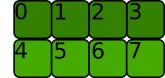

In [19]:
Image('./imgs/shape_2x4.png')

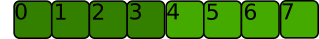

In [24]:
# 内存结构，memory allocation
# row-wise
Image('./imgs/shape_1x8.png')

In [18]:
# stride() gives the number of bytes required to go to the next element in each dimension:
# 4：从第0行跳转到第1行，所需的字节数
# 从 0 跳转大 4
a.stride()

(4, 1)

In [11]:
a.view(4,2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])

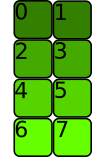

In [26]:
Image('./imgs/shape_4x2.png')

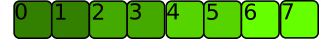

In [33]:
Image('./imgs/shape_1x8_2.png')

In [12]:
a.view(4, 2).stride()

(2, 1)

In [27]:
a.view(4,2).is_contiguous()

True

In [31]:
# doesn't modify the underlying memory allocation
# 不修改内存分配
a.t()

tensor([[0, 4],
        [1, 5],
        [2, 6],
        [3, 7]])

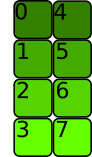

In [30]:
Image('./imgs/shape_4x2_2.png')

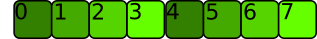

In [19]:
Image('./imgs/shape_1x8_3.png')

In [29]:
# 从 0 跳转到 1，1个额内存
a.t().stride()

(1, 4)

In [35]:
a.t().is_contiguous()

False

In [20]:
a.t().view(2, 4)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [37]:
a.t().reshape(2, 4)

tensor([[0, 4, 1, 5],
        [2, 6, 3, 7]])

In [38]:
a.t().contiguous().view(2, 4)

tensor([[0, 4, 1, 5],
        [2, 6, 3, 7]])

In [21]:
a.t().contiguous().view(2, 4).fill_(1)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]])

In [22]:
a

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [11]:
a.t().reshape(2, 4).fill_(1)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]])

In [12]:
a

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

### view 场景

```
bsz, seqlen, _ = x.shape
xq, xk, xv = self.wq(x), self.wk(x), self.wv(x)

xq = xq.view(bsz, seqlen, self.n_local_heads, self.head_dim)
xk = xk.view(bsz, seqlen, self.n_local_kv_heads, self.head_dim)
xv = xv.view(bsz, seqlen, self.n_local_kv_heads, self.head_dim)
```

## `torch.flip`

In [8]:
x = torch.arange(10)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
x[::-1]

ValueError: step must be greater than zero

In [9]:
torch.flip(x, dims=(0, ))

tensor([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

## `torch.flatten`

In [25]:
t = torch.tensor([[[1, 2],
                   [3, 4]],
                  [[5, 6],
                   [7, 8]]])


In [26]:
torch.flatten(t)

tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [28]:
torch.flatten(t, start_dim=1)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [29]:
t

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [35]:
# flatten(start_dim=0, end_dim=-1) 
t.flatten(1)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

## `torch.transpose()`/`torch.permute()`

- 两者只是接口（或者入参）不同？？

In [2]:
x = torch.randint(0, 5, (2, 3, 4))

In [3]:
x

tensor([[[1, 1, 4, 0],
         [2, 0, 2, 1],
         [1, 1, 4, 2]],

        [[1, 2, 2, 4],
         [1, 3, 3, 0],
         [1, 0, 0, 1]]])

In [13]:
torch.equal(x.transpose(1, 2), x.transpose(2, 1))

True

In [17]:
torch.equal(x.transpose(1, 2), x.permute((0, 2, 1)))

True